# Import Libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gmplot 
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# Set Directory

Dir = '/Users/adamchappell/Documents/Monroe County Analysis/'

In [3]:
#Set Pandas Display options

pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 50)
pd.set_option('expand_frame_repr', False)

# pd.describe_option()

In [4]:
#Read In the Data

crashes = pd.read_csv((Dir + 'monroe-county-crash-data2003-to-2015.csv'), encoding = "ISO-8859-1")



# Examine the Data

In [5]:
# Run Summary Statistics


print("\nshape:\n", crashes.shape)


crashes.describe()


shape:
 (53943, 12)


,Master Record Number,Year,Month,Day,Hour,Latitude,Longitude
count,5.394300e+04,53943.000000,53943.000000,53943.000000,53718.000000,53913.000000,53913.000000
mean,6.748119e+08,2008.968059,6.662162,4.196912,1347.265349,35.582109,-78.619224
std,3.907563e+08,3.789760,3.514630,1.909440,531.654039,11.289883,24.957587
min,1.470500e+04,2003.000000,1.000000,1.000000,0.000000,0.000000,-88.959213
25%,1.991074e+06,2006.000000,4.000000,3.000000,1000.000000,39.142048,-86.551520
50%,9.011241e+08,2009.000000,7.000000,4.000000,1400.000000,39.164430,-86.530992
75%,9.019039e+08,2012.000000,10.000000,6.000000,1700.000000,39.173344,-86.508288
max,9.026394e+08,2015.000000,12.000000,7.000000,2300.000000,41.228665,86.596363


Something looks funny in the latitude and Longitude. min is 0 for latitude even though most are around 39. 
Longitudes should all be around -86, but the max value is positive.

I'll bet there was some inputted information here. Luckily, this won't be too consequential for the analysis we are doing. We aren't worried about coordinates until we are map plotting.

However, at some point we should probably count the invalid coordinates (0's, positives where it should be negative, etc. )


In [6]:
#Let's look at the number of total values, unique values, and null values per column

print("\nNumber of values by column\n\n", crashes.count())

#count unique values

print("\nNumber of unique values by column\n\n", crashes.nunique())

print("\nNumber of nulls by column\n\n", crashes.isnull().sum())









Number of values by column

 Master Record Number    53943
Year                    53943
Month                   53943
Day                     53943
Weekend?                53875
Hour                    53718
Collision Type          53937
Injury Type             53943
Primary Factor          52822
Reported_Location       53908
Latitude                53913
Longitude               53913
dtype: int64

Number of unique values by column

 Master Record Number    53943
Year                       13
Month                      12
Day                         7
Weekend?                    2
Hour                       24
Collision Type              7
Injury Type                 4
Primary Factor             55
Reported_Location       19364
Latitude                15370
Longitude               16068
dtype: int64

Number of nulls by column

 Master Record Number       0
Year                       0
Month                      0
Day                        0
Weekend?                  68
Hour         

Notice Latitude, Longitude, and Reported Location don't always match up

there are over 1000 missing values for primary factor (about 2%), and more than a few hours, reported locations, and other data missing.  Overall, though, when compared to complete records they are relatively few. 



Since these are mostly categorical variables we are dealing with here, 
it would be a good idea to note the categories and the number of records in each one. 

# Value Counts by Different Categories


In [7]:
#counts the number of crashes in each unique category. Also sorts them in descending order. 


pd.set_option('display.min_rows', 20)

for col in crashes.columns:
    if col == "Master Record Number":
        pass
        
    else:
        print(col, "  Value Counts\n", crashes[col].value_counts(), "\n")


Year   Value Counts
 2003    4625
2008    4341
2015    4313
2004    4269
2012    4223
2014    4167
2010    4060
2013    4058
2007    4055
2009    4014
2005    3967
2006    3937
2011    3914
Name: Year, dtype: int64 

Month   Value Counts
 10    5581
9     4994
11    4884
1     4665
12    4598
4     4574
2     4541
8     4480
5     4212
3     3842
7     3820
6     3752
Name: Month, dtype: int64 

Day   Value Counts
 6    9680
3    8133
5    8122
4    7880
2    7473
7    7364
1    5291
Name: Day, dtype: int64 

Weekend?   Value Counts
 Weekday    40604
Weekend    13271
Name: Weekend?, dtype: int64 

Hour   Value Counts
 1700.0    4631
1600.0    4488
1500.0    4283
1200.0    3819
1400.0    3750
1300.0    3526
1800.0    3232
1100.0    3040
1900.0    2442
1000.0    2360
900.0     2318
800.0     2247
700.0     2031
2000.0    1918
2100.0    1794
2200.0    1503
2300.0    1187
0.0       1115
600.0      806
100.0      801
300.0      719
200.0      716
500.0      514
400.0      478
Name: Hour, dt

Note: day 1 = Sunday, day 2 = Monday, day 7 = Saturday, etc (Based on looking at the 'Weekend' variable). Might be helpful to Change the numbers to strings at some point, maybe.

This gives us a good overview of the data in terms of what it can describe.

There are some categories that I find problematic, there is ambiguity around what they represent. For Example, in "Injury Type", "No injury/Unkown" is by far the largest category. But the "Unkown" in the label makes me wonder if some of these were in fact unreported injuries. Additionally, in Primary Factor, There are several categories that simpy include as part of it, "Explain in narrative"-- this represents significant missing data. 

It might be interesting at some point to look at the subsets of data that have these ambiguous categories and see how it is distributed.

From the Location list we can easily see what the top crash sites are. They are E 3rd St, W 3rd St (Probably on the same road), and SR37N & VERNAL

Caveat: The site mentions people may have put in different names for the same street. I'm not sure how to fix this easily. 

# Time Trends

In [8]:
# Make a gradient pivot table of crashes across time. 

piv_year_month = pd.pivot_table(crashes, values="Master Record Number", index="Month", columns="Year", aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

cm = sns.light_palette("green", as_cmap=True)

r = piv_year_month.style.background_gradient(cmap=cm)
r

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Month,,,,,,,,,,,,,
1,383,291,396,310,318,362,376,380,360,395,373,392,329
2,469,380,303,313,388,386,329,363,271,306,284,376,373
3,305,337,266,263,260,327,278,284,258,313,314,283,354
4,337,388,356,332,331,365,370,376,351,362,304,358,344
5,349,391,296,297,308,313,312,309,315,343,317,311,351
6,349,300,287,272,304,310,265,257,260,324,273,254,297
7,322,326,297,264,294,312,292,244,279,300,308,284,298
8,362,347,345,346,334,350,312,326,356,374,309,357,362
9,427,345,343,381,401,379,385,348,391,342,414,407,431


Suprisingly, Most crashes occur in the fall and going into winter. I thought most occured during the summer when people went on vacation. 

Let's Look at how crashes and fatalities have gone up or down over time

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e3b9ee0>,
      dtype=object)

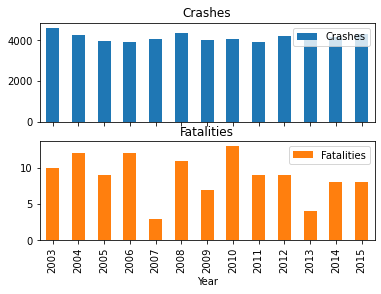

In [9]:

#this pivot table includes all crash types
piv_year_all = pd.pivot_table(crashes, values="Master Record Number", index="Year", aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)
piv_year_all = piv_year_all.rename(columns={'Master Record Number': 'Crashes'})

#this one narrows it to fatalities. 
piv_year_fatal = pd.pivot_table(crashes[crashes["Injury Type"]=='Fatal'], values="Master Record Number", index="Year", aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)
piv_year_fatal = piv_year_fatal.rename(columns={'Master Record Number': 'Fatalities'})


#this is simply putting them together and graphing them
piv_year = pd.concat([piv_year_all, piv_year_fatal], axis=1)

                                                
piv_year.plot.bar(subplots=True)



Doesn't seem like there has been a huge trend up or down for either. 

Ok, We're done with across time for now. Let's check out a typical week and how crashes are distrubuted there

In [10]:
# Pivot Table-- # Collisions By Hour and Day

piv_day_hour = pd.pivot_table(crashes, values="Master Record Number", index="Hour", columns="Day", aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)


s = piv_day_hour.style.background_gradient(cmap=cm)
s


Day,1,2,3,4,5,6,7
Hour,,,,,,,
0.0,228,105,108,120,123,163,268
100.0,183,60,63,79,83,127,206
200.0,176,46,71,69,65,106,183
300.0,185,35,68,58,62,104,207
400.0,96,36,40,53,58,75,120
500.0,60,73,68,70,74,96,73
600.0,69,129,129,131,147,117,84
700.0,73,347,385,401,384,316,125
800.0,86,363,407,431,380,380,200


The darker squares represent higher values.  Notice most crashes occur around 4 or 5 pm, except on Saturday and sunday, When both midday and nightime crashes increase somewhat. Makes sense.

# Location Analysis


In [11]:
#Compare Unique Locations to day of the week, look for correlations
piv_location_day = pd.pivot_table(crashes, 
                              values="Master Record Number", 
                              index="Reported_Location", 
                              columns=("Day"), 
                              aggfunc='count', 
                              fill_value=None, margins=True, dropna=True, margins_name='All', observed=False)

piv_location_day.sort_values(by=('All'), ascending=False,inplace=True)

#Drop " 'All' Values"
piv_location_day = piv_location_day.drop("All", axis=0)
piv_location_day = piv_location_day.drop("All", axis=1)

#plot gradient pivottable (top 50 locations only)
t = piv_location_day[:50].style.background_gradient(cmap=cm)
t


Day,1,2,3,4,5,6,7
Reported_Location,,,,,,,
E 3RD ST,31.000000,64.000000,58.000000,45.000000,45.000000,75.000000,57.000000
W 3RD ST,21.000000,29.000000,37.000000,29.000000,28.000000,45.000000,33.000000
SR37N & VERNAL,10.000000,31.000000,33.000000,29.000000,30.000000,36.000000,28.000000
3RD ST,14.000000,17.000000,19.000000,27.000000,32.000000,44.000000,42.000000
S WALNUT ST,11.000000,22.000000,29.000000,29.000000,25.000000,28.000000,28.000000
E 10TH ST,25.000000,18.000000,22.000000,23.000000,22.000000,32.000000,11.000000
N WALNUT ST,28.000000,9.000000,12.000000,10.000000,23.000000,18.000000,24.000000
SR37 & VERNAL,13.000000,18.000000,21.000000,13.000000,15.000000,28.000000,15.000000
S COLLEGE MALL RD,13.000000,17.000000,22.000000,11.000000,18.000000,24.000000,18.000000


It seems the top five streets for crashes  happen mostly during the workweek. the Next two streets (E. 10th and N Walnut) seem to be weekend crash sites. 

In [12]:
#Note: This Cell was causing the Kernel to stop for some reason so I have commented it out for now. Should work individually though. 

# #Compare Streets to hour, look for correlations (Not that useful)
# piv_location_hour = pd.pivot_table(crashes, 
#                               values="Master Record Number", 
#                               index="Reported_Location", 
#                               columns=("Hour"), 
#                               aggfunc='count', 
#                               fill_value=None, margins=True, dropna=True, margins_name='All', observed=False)

# #sort by crash count
# piv_location_hour.sort_values(by=('All'), ascending=False,inplace=True)

# print(piv_location_hour.shape[0])

# #Drop " 'All' Values"
# piv_location_hour = piv_location_hour.drop("All", axis=0)
# piv_location_hour = piv_location_hour.drop("All", axis=1)


# cm = sns.light_palette("green", as_cmap=True)
# t = piv_location_hour[:100].style.background_gradient(cmap=cm)
# t

Top crash sites have the most crashes during the day. Consistent with earlier Day/Time Heatmap

Let's check out if there are any particularly deadly or incapacitating roads

In [13]:

# sort locations by crash counts and get top 10 sites
locations = crashes['Reported_Location'].value_counts()
top_locations = locations[:10]


#pivot locations by injury type
piv_location_crash = pd.pivot_table(crashes, 
                              values="Master Record Number", 
                              index="Reported_Location", 
                              columns=("Injury Type"), 
                              aggfunc='count', 
                              fill_value=None, margins=True, dropna=True, margins_name='All', observed=False)

# sortby = 'Incapacitating
sortby = 'Fatal'

piv_location_crash.sort_values(by=(sortby), ascending=False,inplace=True)


print(piv_location_crash)

# #Drop " 'All' Values"
# piv_location = piv_location.drop("All", axis=0)
# piv_location = piv_location.drop("All", axis=1)

# t = piv_location_crash.style.background_gradient(cmap=cm)
# t


Injury Type                 Fatal  Incapacitating  No injury/unknown  Non-incapacitating    All
Reported_Location                                                                              
All                         115.0          1088.0            41571.0             11134.0  53908
FLATWOODS & SR46W             3.0             1.0               26.0                10.0     40
SR37N & WAYPORT               2.0             2.0               22.0                 7.0     33
CLEVE BUTCHER & FAIRFAX RD    2.0             2.0                9.0                 NaN     13
PINE GROVE & SR446            1.0             NaN               11.0                 2.0     14
OLD SR 46 & SR46E             1.0             NaN                NaN                 NaN      1
OLD SR 37 & SR37S             1.0             NaN                4.0                 1.0      6
OLD RICHARDSON & SR446S       1.0             3.0                9.0                 5.0     18
NORTH & WALNUT ST             1.0       

There doesn't seem to be a particularly deadly or frequently incapacitating street to have an accident on (sorted streets by fatalities and then by # of incapacitating injuries.)

Let's see what type of collisions are deadliest

In [14]:
# pivot of collision type to injury type

# hypothesis: pedestrian, bicycle collisions will have higher fatalities/incapacitations than car collision

piv_type = pd.pivot_table(crashes, values="Master Record Number", index="Collision Type", columns=("Injury Type"),
                          aggfunc='count', fill_value=None, margins=True, dropna=True, margins_name='All', observed=False)

print()

piv_type.sort_values(by=('All'), ascending=False,inplace=True)

print(piv_type)




Injury Type       Fatal  Incapacitating  No injury/unknown  Non-incapacitating    All
Collision Type                                                                       
All               115.0          1089.0            41597.0             11136.0  53937
2-Car              31.0           451.0            30807.0              6317.0  37606
1-Car              49.0           205.0             7854.0              2137.0  10245
3+ Cars             5.0           116.0             1855.0              1176.0   3152
Moped/Motorcycle   21.0           154.0              213.0               619.0   1007
Bus                 1.0             9.0              758.0                82.0    850
Pedestrian          8.0           104.0               49.0               448.0    609
Cyclist             NaN            50.0               61.0               357.0    468


In [15]:
# So what Factors are leading  to the top three collision types for fatalities?


#Pivot table only includes factors that contributed to 1-car, 2-car, or motorcycle crashes
piv_factor = pd.pivot_table(crashes[crashes["Collision Type"].isin(("1-Car", "2-Car", "Moped/Motorcycle"))] , 
                          values="Master Record Number", index=("Primary Factor"), columns=("Injury Type"),
                          aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)


piv_factor.sort_values(by=('Fatal'), ascending=False,inplace=True)

#print top 10
print(piv_factor[:10])




Injury Type                            Fatal  Incapacitating  No injury/unknown  Non-incapacitating
Primary Factor                                                                                     
RAN OFF ROAD RIGHT                      29.0           126.0             2021.0               695.0
LEFT OF CENTER                          18.0            48.0              642.0               272.0
UNSAFE SPEED                            15.0            40.0              857.0               393.0
FAILURE TO YIELD RIGHT OF WAY            6.0           200.0             7666.0              2362.0
ALCOHOLIC BEVERAGES                      6.0            21.0              463.0               241.0
OTHER (DRIVER) - EXPLAIN IN NARRATIVE    5.0            51.0             4658.0               801.0
DISREGARD SIGNAL/REG SIGN                4.0            53.0             1290.0               665.0
OVERCORRECTING/OVERSTEERING              3.0            16.0              403.0               141.0


Running off the road, driving left of center, and unsafe speeds are deadly factors. Running off the road is not one I was expecting. 

Below are some Extra analysis before we get to the final map plotter. 

In [16]:
# Zero in on one-car collisions


piv_factor = pd.pivot_table(crashes[crashes["Collision Type"].isin(("1-Car", ))] , 
                          values="Master Record Number", index=("Primary Factor"), columns=("Injury Type"),
                          aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

print()

piv_factor.sort_values(by=('Fatal'), ascending=False,inplace=True)

print(piv_factor[:10])



Injury Type                            Fatal  Incapacitating  No injury/unknown  Non-incapacitating
Primary Factor                                                                                     
RAN OFF ROAD RIGHT                      24.0           106.0             1891.0               612.0
UNSAFE SPEED                             7.0            12.0              362.0               183.0
ALCOHOLIC BEVERAGES                      5.0             6.0              239.0               151.0
OTHER (DRIVER) - EXPLAIN IN NARRATIVE    3.0            12.0              813.0               189.0
RAN OFF ROAD LEFT                        3.0             NaN               34.0                15.0
PEDESTRIAN ACTION                        2.0             NaN                2.0                39.0
DRIVER ASLEEP OR FATIGUED                1.0             3.0               95.0                64.0
LEFT OF CENTER                           1.0             1.0               47.0                27.0

In one-car crashes, Running off the road, unsafe speeds, and alchohol seem to be involved the most. 

In [17]:
#ran off the road... but what roads??
piv_factor_roads = pd.pivot_table(crashes[(crashes["Collision Type"].isin(("1-Car", )) )& 
                                          (crashes["Primary Factor"].isin(("RAN OFF ROAD RIGHT", )) )] , 
                          values="Master Record Number", index=("Primary Factor", "Reported_Location"), columns=("Injury Type"),
                          aggfunc='count', fill_value=None, margins=True, dropna=True, margins_name='All', observed=False)

print()

piv_factor_roads.sort_values(by=('All'), ascending=False,inplace=True)

pd.set_option('display.min_rows', 100)
print(piv_factor_roads[:20])



Injury Type                                 Fatal  Incapacitating  No injury/unknown  Non-incapacitating   All
Primary Factor     Reported_Location                                                                          
All                                          24.0           106.0             1891.0               612.0  2633
RAN OFF ROAD RIGHT HINDS & SR45W              NaN             1.0                6.0                 2.0     9
                   17TH ST & MONROE           NaN             1.0                3.0                 4.0     8
                   WALCOTT & WOODYARD RD      NaN             NaN                7.0                 NaN     7
                   OLD RICHARDSON & SR446S    NaN             NaN                6.0                 1.0     7
                   SR37S                      NaN             NaN                7.0                 NaN     7
                   SR37N                      NaN             NaN                5.0                 2.0     7


Running off the road occurs on some roads more than others (17th street & Monroe is a primary offender), but there isn't any outlier that I was hoping to catch

In [18]:
#Zero in on two-car collisions

# for a later time

In [19]:
#Zero in on motorcycle collisions

# for a later time

# Alcohol influence


In [20]:
#Let's see how a day of the week/ time of day count changes when we limit the crashes to those involving alcohol

piv_alcohol_day_hour = pd.pivot_table(crashes[(crashes["Primary Factor"]== "ALCOHOLIC BEVERAGES")], values="Master Record Number", index="Hour", columns="Day", aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)


s = piv_alcohol_day_hour.style.background_gradient(cmap=cm)
s


Day,1,2,3,4,5,6,7
Hour,,,,,,,
0.0,11.000000,8.000000,5.000000,3.000000,6.000000,11.000000,21.000000
100.0,20.000000,6.000000,4.000000,3.000000,12.000000,15.000000,19.000000
200.0,28.000000,1.000000,4.000000,5.000000,4.000000,14.000000,23.000000
300.0,23.000000,3.000000,9.000000,6.000000,15.000000,19.000000,28.000000
400.0,14.000000,2.000000,3.000000,4.000000,5.000000,12.000000,11.000000
500.0,3.000000,nan,3.000000,nan,nan,3.000000,6.000000
600.0,3.000000,nan,1.000000,nan,3.000000,1.000000,2.000000
700.0,1.000000,1.000000,nan,nan,2.000000,1.000000,1.000000
800.0,1.000000,nan,1.000000,nan,4.000000,1.000000,1.000000


More Alcohol involved accidents occur at night. no surprise there. 

# How much more likely are pedestrian, bicycle, and motorcycle crashes to be fatal than car-only crashes?

Hypothesis: Though they occur less often, they are more likely to be fatal by an order of magnitude, at least. 

                  Fatalities
Collision Type              
1-Car                     49
2-Car                     31
3+ Cars                    5
Bus                        1
Moped/Motorcycle          21
Pedestrian                 8
                  Incapacitating
Collision Type                  
1-Car                        205
2-Car                        451
3+ Cars                      116
Bus                            9
Cyclist                       50
Moped/Motorcycle             154
Pedestrian                   104
                  Total Crashes Reported
Collision Type                          
1-Car                              10245
2-Car                              37606
3+ Cars                             3152
Bus                                  850
Cyclist                              468
Moped/Motorcycle                    1007
Pedestrian                           609
                  Percent Fatal  Percent Incapacitating
1-Car                  0.004783               

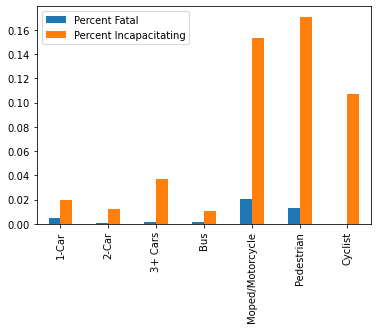

In [21]:
#maps collision type to fatalities
piv_col_type_fatal = pd.pivot_table(crashes[crashes["Injury Type"]=="Fatal"], values="Master Record Number", index="Collision Type", aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)
piv_col_type_fatal = piv_col_type_fatal.rename(columns={'Master Record Number': 'Fatalities'})

print(piv_col_type_fatal)

#maps collision type to incapacitation
piv_col_type_inc = pd.pivot_table(crashes[crashes["Injury Type"]=='Incapacitating'], values="Master Record Number", index="Collision Type", aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)
piv_col_type_inc = piv_col_type_inc.rename(columns={'Master Record Number': 'Incapacitating'})

print(piv_col_type_inc)

#maps collision type to total records
piv_col_type_total = pd.pivot_table(crashes, values="Master Record Number", index="Collision Type", aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)
piv_col_type_total = piv_col_type_total.rename(columns={'Master Record Number': 'Total Crashes Reported'})

print(piv_col_type_total)


#joins the three
piv_col_type_all = pd.concat([piv_col_type_fatal, piv_col_type_inc, piv_col_type_total], axis=1)

#creates fatality ratio variable
piv_col_type_all["Percent Fatal"] = piv_col_type_all["Fatalities"] / piv_col_type_all["Total Crashes Reported"]

#creates incapacitating ratio variable
piv_col_type_all["Percent Incapacitating"] = piv_col_type_all["Incapacitating"] / piv_col_type_all["Total Crashes Reported"]

#deletes all columns except ratio variables
piv_col_perc = piv_col_type_all.drop(["Fatalities", "Incapacitating", "Total Crashes Reported"], axis=1)


print(piv_col_perc)
                                                
piv_col_perc.plot.bar(subplots=False)



I was correct. Notice How Motorcycle Accidents are the most likely to be fatal out of any kind. Also if you crash on a motorcycle, holding all other variables constant, there is a 16% chance you will be seriously injured.  

# How has distracted driving and cell phone related accidents changed over time?



      Cell-phone related crashes
Year                            
2003                          11
2004                          13
2005                          13
2006                          12
2007                          15
2008                          10
2009                          13
2010                          17
2011                           8
2012                          14
2013                           6
2014                           5
2015                           4
      Distracted-Driver related crashes
Year                                   
2003                                  7
2004                                122
2005                                 98
2006                                172
2007                                204
2008                                196
2009                                211
2010                                123
2011                                110
2012                                107
2013                     

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ea05fa0>,
      dtype=object)

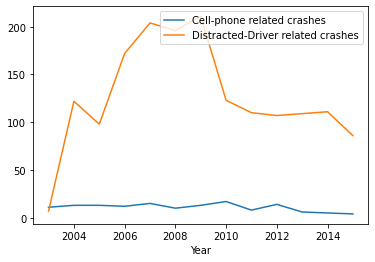

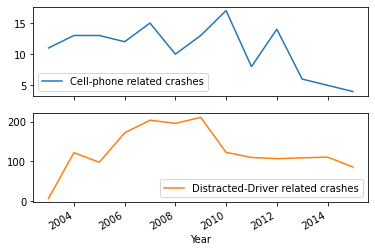

In [22]:
# Hypothesis: Increased

piv_cell = pd.pivot_table(crashes[crashes["Primary Factor"]=="CELL PHONE USAGE"], 
                          values="Master Record Number", index=("Year"), 
                          aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

piv_cell = piv_cell.rename(columns={'Master Record Number': 'Cell-phone related crashes'})

print(piv_cell)

piv_dd = pd.pivot_table(crashes[crashes["Primary Factor"]=="DRIVER DISTRACTED - EXPLAIN IN NARRATIVE"], 
                          values="Master Record Number", index=("Year"), 
                          aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

piv_dd = piv_dd.rename(columns={'Master Record Number': 'Distracted-Driver related crashes'})

print(piv_dd)

# piv_year_fatal = piv_year_fatal.rename(columns={'Master Record Number': 'Fatalities'})


piv_ddt = pd.concat([piv_cell, piv_dd], axis=1)

print(piv_ddt)

                                                
piv_ddt.plot.line(subplots=False)
piv_ddt.plot.line(subplots=True)

Cell Phone and Distracted Driver related crashes have decreased from a high point between 2008-2010, which was about the time smart phones became popular

# Map

Let's Map where the top Crash Sites are

In [23]:
# Google Map

# GoogleMapPlotter return Map object 
# Pass the center latitude and 
# center longitude 

#here we will make an empty map centered in Monroe County
gmap1 = gmplot.GoogleMapPlotter(39.16465511, 
                                -86.533408, 13 ) 
    
# Pass the absolute path 
gmap1.draw( Dir + "map11.html" )

#Now we will make a heatmap with top crash sites by # of occurance

# Create a new subset that includes only crashes in the top ten crash locations
top_loc_crashes =  crashes[crashes["Reported_Location"].isin(top_locations.index)]
    
top_loc_crashes.shape   

# heatmap plot heating Type 
# points on the Google map 
points = 2000
gmap1.heatmap( top_loc_crashes["Latitude"], top_loc_crashes["Longitude"]) 
  
gmap1.draw( Dir + "map14.html" ) 

# find these maps in your project diretory and click to open


If you look at the heatmap, it looks as though the highest number of accidents occur on highway 46 (3rd street) running east to west and Walnut Street running north to south.

That makes sense because they go to the heart of the city so they are probably be busiest

It would be interesting to get a proxy variable for traffic flow and compare traffic flow to crash rate to see which road a person is truly most likely to crash on, controlling for traffic. In other words, where is the road itself worse, not because of who drives on it but because of the road.  



# Where to go further...

# # Interesting Bolean Variables to Possibly Add and Analyze

group hours into general time of day (morning, afternoon, evening, etc. )

car collision:  1- 2- or 3+ -collisions (and maybe bus?)
non-car:  pedestrian, bicycle,  motorcycle together

serious injury: fatal or incapacitated

Under the influence: Illegal drugs/ Alcohol involved

distracted: includes cell phone and "distracted" general

We could group the primary factors together in a number of ways depending on our goal. 

# # Remove observations with missing data and run analysis again?

# # Run Predictions for future months/years 